<h1><center>IST 597 Foundations of Deep Learning</center></h1>

---

<h2><center>Assignment 10</center><h2>

**Instructor** : Dr. C. Lee Giles <br>
**TA** : Neisarg Dave, Shaurya Rohatgi
<br><br>

Credits: 

<h3>Course Policy<h3>

Carefully read all the instructions, before you start working on the assignment

* Give maximum explanation for each sub-problems.

* Assignments are due before class at Monday 05:59:59 pm. Please check the due date on the official course webportalg Portal.

* Please avoid single line answers, submissions without any explanations would receive 0 points.

* Late submissions will be graded with 20% discount per day. Day 1 starts immediately after the submission deadline.

* Every assignment has a hard deadline, usually 3 days past the original due date, i.e. Thursday after the due Monday

* Late submissions (penalty or not) are not accepted after the hard deadline.

* All source materials must be cited. The University Academic Code of Conduct will be strictly enforced.

* We will be creating Canvas submission page for this. Submit all files on Canvas.

* All queries related to Assignment should have a subject line *IST597:Assignment_10 Queries*

---


<h2><center>Multi Layer Perceptron</center><h2>

Multiplayer Perceptron is a feed forward neural network composed of multiple layers of affine transformations followed by non linearity function. Each layer of an MLP is defined as:
$$
z^{(l)} = W^{(l)}x^{(l-1)} + b^{(l)}
$$ 

$$
x^{(l)} = f(z^{(l)})
$$

Here, $l$ denotes the layer of MLP, $W$ and $b$ are the trainable parameters called *weight* and *bias* respectively

ReLU or Rectified Linear Unit is the most common non linear layer used with MLP.
More about ReLU can be found here: https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

In this assignment you are required to do the following:

+ Create an MLP
  + Write the *forward* function for affine transformation
  + Write the *backward* function (to calculate gradients) for the affine transformation
  + Create a Neural Network by stacking these transformations

+ Train the Neural Network on Fashion MNIST Dataset
  + Write Loss Function for the training
  + Write parameter update routine
  + Run Validation 
  + Plot Train and Validation Loss Curves using Matplotlib 

+ Testing the Neural Network
  + Change the *seed* and train the neural network 10 times
  + Report the mean and variance over 10 trials on the following metrics:
    + Accuracy
    + Precision
    + Recall
    + F1
    + ROC curve

+ Change the number of parameters in the Neural Network 
  + Train a underfit model
  + Train a overfit model
  + Demostrate the difference between overfitting and underfitting


In [1]:
import torch
import random
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# select device as cuda
device = torch.device("cuda:0")

# set random seeds
seed = 1234 ## change this seed when you run trials
random.seed(seed)
torch.manual_seed(seed)

### Gradient Update
To update gradients, from the equation of affine transformation we have:

$$
z^{(l)} = W^{(l)}x^{(l-1)} + b
$$ 

We can calulate all the partial derivations in the following fashion

$$
\frac{\partial z^{(l)}}{\partial x^{(l-1)}} = W^{(l)}
$$

$$
\frac{\partial z^{(l)}}{\partial W^{(l)}} = x^{(l-1)}
$$

$$
\frac{\partial z^{(l)}}{\partial b^{(l)}} = 1
$$

To write the *backward* function, we need one more step. *backward* functon takes *grad_output* as its input. It is the backward flow of gradients coming from the final output $\hat y$ and can be mathematically expressed as:
$$
  grad\_output = \frac{\partial \hat y}{\partial z^{(l)}}
$$

*backward* functions gives out three values:

$$
grad\_x = \frac{\partial \hat y}{\partial x^{(l-1)}} = \frac{\partial \hat y}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial x^{(l-1)}} 
$$

$$
grad\_w = \frac{\partial \hat y}{\partial W^{(l)}} = \frac{\partial \hat y}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial W^{(l)}}
$$


$$
grad\_b = \frac{\partial \hat y}{\partial b^{(l)}} =  \frac{\partial \hat y}{\partial z^{(l)}} \frac{\partial z^{(l)}}{\partial b^{(l)}}
$$

In the code below, update the *forward* and *backward* functions of class LinearFunction


In [6]:
class LinearFunction(torch.autograd.Function):
  @staticmethod
  def forward(ctx, x, W, b):
    """
    # x -> input matrix of size n_samples x sdim
    # W -> transformation matrix
    # b -> bias term 
    """
    ctx.save_for_backward(x, W, b)
    # Write your affine transformation here:
    #-------------------
    z = None
    #-------------------
    return z
    
  @staticmethod
  def backward(ctx, grad_output):
    x, W, b = ctx.saved_tensors
   
    # Write gradient updates here:
    #----------------------------
    grad_x = None
    grad_w = None
    grad_b = None
    #-----------------------------
    return grad_x, grad_w, grad_b


Class CustomLinearLayer uses previously defined LinearFunction to create one layer of Neural Network. Look at the initial values given to $W$ and $b$.
You do not need to change anything in this class.

In [7]:
class CustomLinearLayer(torch.nn.Module):
  def __init__(self, in_features, out_features):
    super(CustomLinearLayer, self).__init__()
    self.in_features = in_features
    self.out_features = out_features
    w = torch.normal(mean = 0, std = 0.1, size = [in_features, out_features], requires_grad=True)
    b = torch.full([out_features], 0.01, requires_grad=True)
    w = torch.nn.Parameter(w)
    b = torch.nn.Parameter(b)
    self.register_parameter('w', w)
    self.register_parameter('b', b)
    self.linear_function = LinearFunction.apply
  
  def forward(self, x):
    return self.linear_function(x, self.w, self.b)

In the Neural Network class below class Below, Add two linear layers of the following sizes:
+ 784 x 512
+ 512 x 10

In the forward function, 
+ Apply layer_1 on input
+ Apply activation function on the result
+ Apply layer_2 on the result
+ Apply Softmax and return the final result

In [8]:
class NeuralNetwork(torch.nn.Module):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    # Add Linear layers below 
    #-----------------------------------
    self.layer_1 = None
    self.layer_2 = None
    # ------------------------------------
    self.activation = torch.nn.ReLU()
    self.softmax = torch.nn.Softmax(dim=-1)
  
  def forward(self, x):
    # Apply layers defined above:
    #-------------------------------
    output = None
    #-------------------------------
    return output

Fasion MNIST dataset is a set of grayscale images categorized into 10 classes. To train our neural network, first we need to define loss function. $y$ is the ground truth class label and $probs$ is the probability distribution given by our Neural Network over 10 classes, update the *forward* function of loss class below. 

$$
ce\_loss = \frac{1}{{\#samples}}\sum^{\#samples}_i y_i.\log(probs_i)
$$

*Hint*: Try representing $y$ as one hot vector

In [9]:
class CrossEntropyLoss(torch.nn.Module):
  def __init__(self):
    super(CrossEntropyLoss, self).__init__()
  
  def forward(self, probs, y):
    #Write loss function here:
    #-------------------------------
    loss = None
    #-------------------------------
    return loss

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

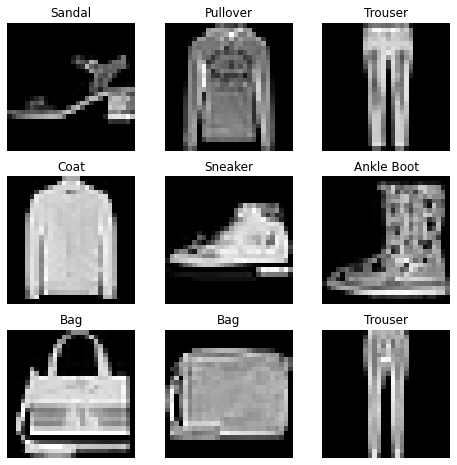

In [3]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Fashion MNIST dataset loaded from pytorch APIs only has two sets: train and test. Split the train data into train and validation sets with 50K samples in train and 10K samples in validation set. The data split should be random.

*Hint* Look for a function in *torch.utils.data*

In [4]:
# split mnist trainset into two sets: mnist trainset -> 50000 , mnist validation set -> 10000
#----------------
train_data, val_data = None

#----------------

In [5]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [11]:
model = NeuralNetwork().cuda()
ce_loss = CrossEntropyLoss()

1) The gradients we calculated in the start can be accessed by iterating over model.parameters() as *params.grad*. Write the parameter update rule in the training code below: 

$$
param := param - learning\_rate*gradient
$$

2) Write validation loop which runs every epoch and prints the following metrics on validation set:
  + Accuracy
  + Precision
  + Recall
  + F1 
  + roc_auc

3) Store the training loss and validation loss in each iteration and plot a graph comparing them.

In [ ]:
from torch.utils.data import DataLoader

batch_size = 1024
train_loader = DataLoader(train_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)
valid_loader = DataLoader(val_data, batch_size=batch_size)
max_epochs = 10
learning_rate = 0.01

for epoch in range(max_epochs):
  for idx, data in enumerate(train_loader):
    features, labels = data

    features = features.cuda()

    labels = labels.cuda()
    probs = model(features.reshape([-1, 784]))

    loss = ce_loss(probs, labels)
    print("Epoch {0}/{1} Iteration {2}/{3} Loss {4}: ".format(epoch, max_epochs, idx, len(train_loader), loss))

    for param in model.parameters():
      param.grad = None

    loss.backward()

    for name, param in model.named_parameters():
      # Write paramtere update routine here:
      # --------------
      new_param = None
      
      # --------------
      with torch.no_grad():
        param.copy_(new_param)

  # Write Validation routine here: 
  #----------------------------
    




Testing the Neural Network
  + Change the *seed* and train the neural network 10 times
  + Report the mean and variance over 10 trials on the following metrics:
    + Accuracy
    + Precision
    + Recall
    + F1
    + ROC curve



In [ ]:
## Write Relevant training and reporting code here:
#----------------------------------------------------

+ Change the number of parameters in the Neural Network 
  + Train an underfit model
  + Train a overfit model
  + Demostrate the difference between overfitting and underfitting. Give detailed reasoning.

In [13]:
## Create new models here with different number of parameters, discuss and demonstrate underfitting and overfitting in NN
#----------------------------------------------------